<a href="https://colab.research.google.com/github/C22342081/Applied-Predictive-Analytics-Lab/blob/main/Lab_2_Tabular_Data_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **Read Dataset**

In [ ]:

import pandas as pd

from google.colab import data_table
data_table.enable_dataframe_formatter()

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('https://raw.githubusercontent.com/aws-samples/aws-machine-learning-university-accelerated-tab/master/data/review/review_dataset.csv')

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (95485, 13)


2. **Overall Statistics**

In [ ]:
df.head()

,Pet ID,Outcome Type,Sex upon Outcome,Name,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Age upon Outcome Days
0,A794011,1.0,Neutered Male,Chunk,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,Domestic Shorthair Mix,Brown Tabby/White,730,730
1,A776359,1.0,Neutered Male,Gizmo,7201 Levander Loop in Austin (TX),Stray,Normal,Dog,Intact Male,Chihuahua Shorthair Mix,White/Brown,365,365
2,A674754,0.0,Intact Male,NaN,12034 Research in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,Orange Tabby,6,6
3,A689724,1.0,Neutered Male,*Donatello,2300 Waterway Bnd in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Black,60,60
4,A680969,1.0,Neutered Male,*Zeus,4701 Staggerbrush Rd in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,White/Orange Tabby,7,60


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95485 entries, 0 to 95484
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pet ID                 95485 non-null  object 
 1   Outcome Type           95485 non-null  float64
 2   Sex upon Outcome       95484 non-null  object 
 3   Name                   59138 non-null  object 
 4   Found Location         95485 non-null  object 
 5   Intake Type            95485 non-null  object 
 6   Intake Condition       95485 non-null  object 
 7   Pet Type               95485 non-null  object 
 8   Sex upon Intake        95484 non-null  object 
 9   Breed                  95485 non-null  object 
 10  Color                  95485 non-null  object 
 11  Age upon Intake Days   95485 non-null  int64  
 12  Age upon Outcome Days  95485 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 9.5+ MB


In [ ]:
df.describe()

,Outcome Type,Age upon Intake Days,Age upon Outcome Days
count,95485.000000,95485.000000,95485.000000
mean,0.564005,703.436959,717.757313
std,0.495889,1052.252197,1055.023160
min,0.000000,0.000000,0.000000
25%,0.000000,30.000000,60.000000
50%,1.000000,365.000000,365.000000
75%,1.000000,730.000000,730.000000
max,1.000000,9125.000000,9125.000000


In [ ]:
print(df.columns)

Index(['Pet ID', 'Outcome Type', 'Sex upon Outcome', 'Name', 'Found Location',
       'Intake Type', 'Intake Condition', 'Pet Type', 'Sex upon Intake',
       'Breed', 'Color', 'Age upon Intake Days', 'Age upon Outcome Days'],
      dtype='object')


Separating model features and model target

In [ ]:
model_features = df.columns.drop('Outcome Type')
model_target = 'Outcome Type'

print('Model features: ', model_features)
print('Model target: ', model_target)

Model features:  Index(['Pet ID', 'Sex upon Outcome', 'Name', 'Found Location', 'Intake Type',
       'Intake Condition', 'Pet Type', 'Sex upon Intake', 'Breed', 'Color',
       'Age upon Intake Days', 'Age upon Outcome Days'],
      dtype='object')
Model target:  Outcome Type


Understand which features are numerical and categorical

In [ ]:
import numpy as np
numerical_features_all = df[model_features].select_dtypes(include=np.number).columns
print('Numerical columns:',numerical_features_all)

print('')

categorical_features_all = df[model_features].select_dtypes(include='object').columns
print('Categorical columns:',categorical_features_all)

Numerical columns: Index(['Age upon Intake Days', 'Age upon Outcome Days'], dtype='object')

Categorical columns: Index(['Pet ID', 'Sex upon Outcome', 'Name', 'Found Location', 'Intake Type',
       'Intake Condition', 'Pet Type', 'Sex upon Intake', 'Breed', 'Color'],
      dtype='object')


3. **Basic plots**

BAR PLOT

In [ ]:
df[model_target].value_counts()

,count
Outcome Type,
1.0,53854
0.0,41631


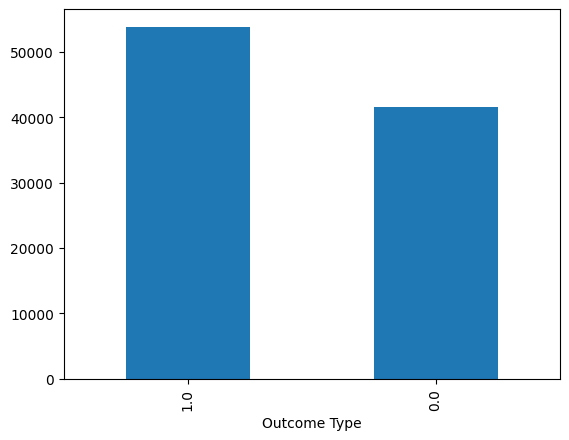

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

df[model_target].value_counts().plot.bar()
plt.show()

onto the categorical features, exploring number of unique values per feature

In [ ]:
for c in categorical_features_all:
    print(df[c].value_counts())

Pet ID
A815419    1
A794011    1
A776359    1
A674754    1
A689724    1
          ..
A766700    1
A801106    1
A754682    1
A758536    1
A767231    1
Name: count, Length: 95485, dtype: int64
Sex upon Outcome
Neutered Male    30244
Spayed Female    28145
Intact Female    13724
Intact Male      13646
Unknown           9725
Name: count, dtype: int64
Name
Bella          338
Luna           313
Max            311
Daisy          239
Lucy           223
              ... 
Reck             1
Sophie Love      1
Malika           1
Villy Pixel      1
Finola           1
Name: count, Length: 17468, dtype: int64
Found Location
Austin (TX)                          14833
Travis (TX)                           1402
7201 Levander Loop in Austin (TX)      644
Outside Jurisdiction                   607
Del Valle (TX)                         426
                                     ...  
6902 Apperson St in Austin (TX)          1
6701 Woodhue in Austin (TX)              1
14950 Swiss Dr in Travis (TX)        

Sex upon Outcome


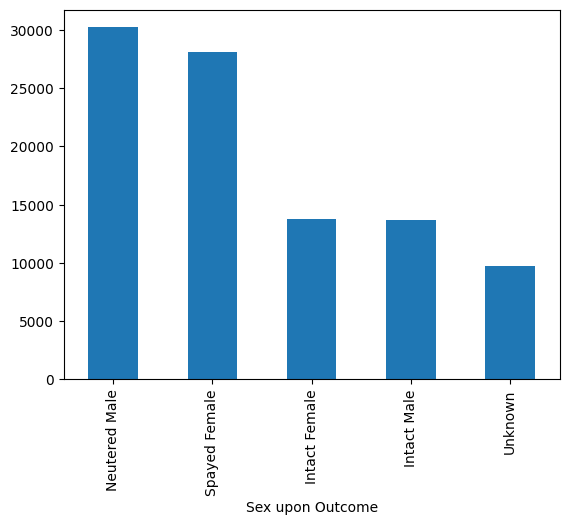

Intake Type


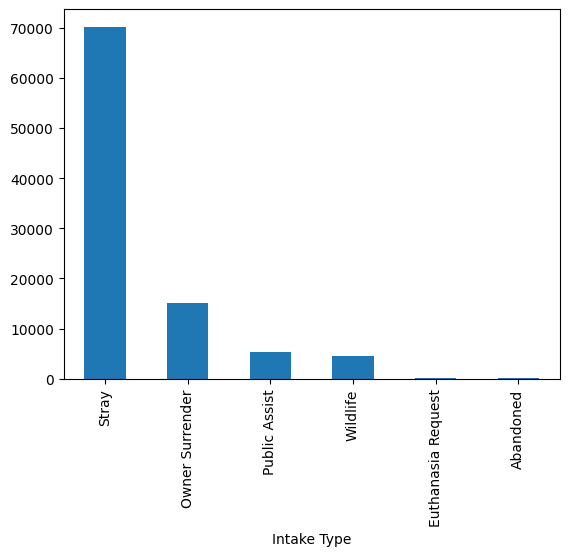

Intake Condition


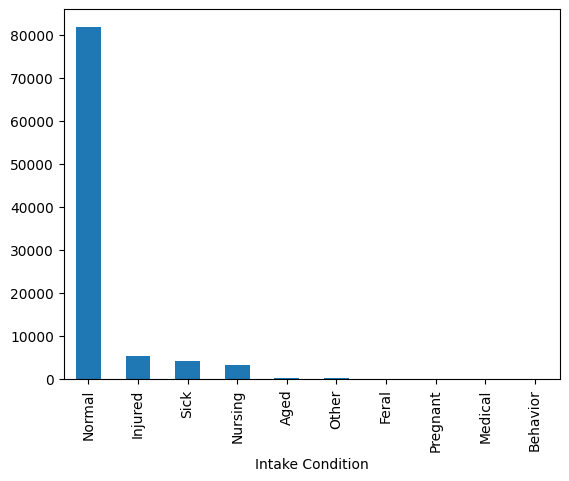

Pet Type


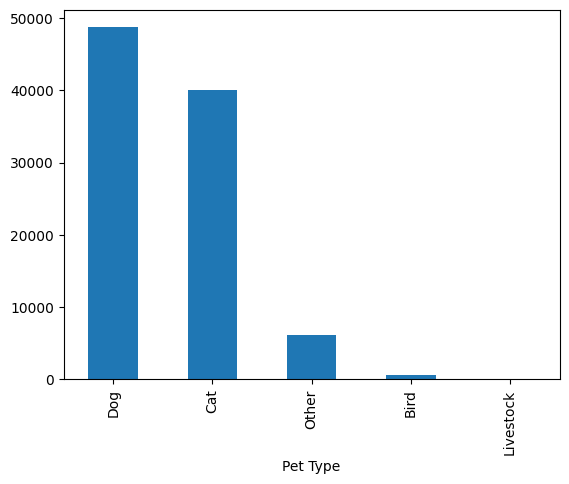

Sex upon Intake


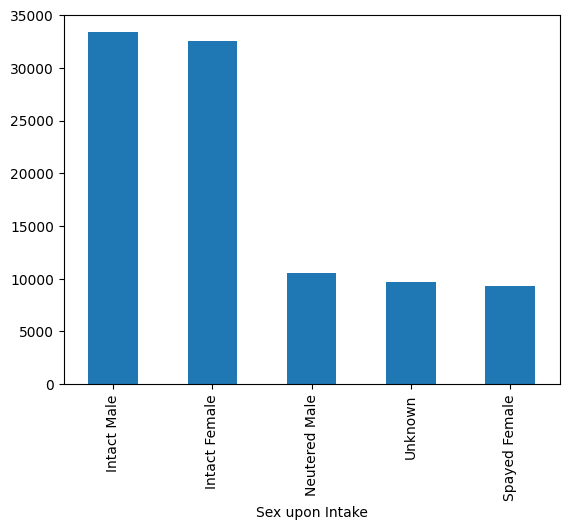

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

for c in categorical_features_all:
    if len(df[c].value_counts()) < 50:
        print(c)
        df[c].value_counts().plot.bar()
        plt.show()

HISTOGRAM

Age upon Intake Days


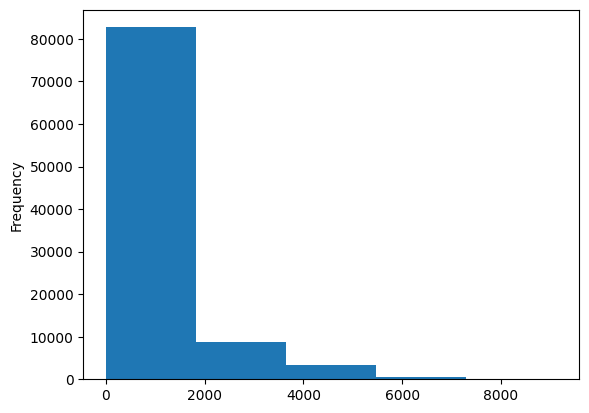

Age upon Outcome Days


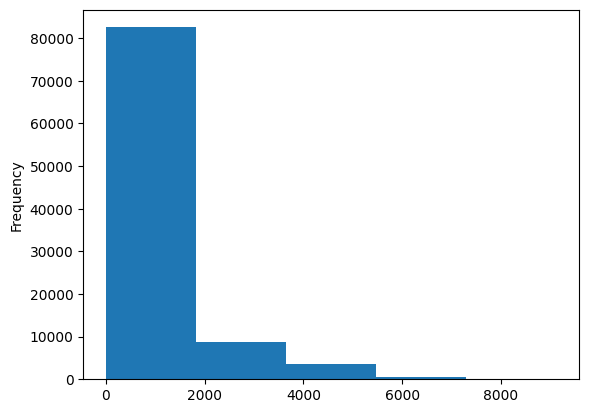

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

for c in numerical_features_all:
    print(c)
    df[c].plot.hist(bins=5)
    plt.show()


If for some histograms the values are heavily placed in the first bin, it is good to check for outliers, either checking the min-max values of those particular features and/or explore value ranges.

In [ ]:
for c in numerical_features_all:
    print(c)
    print('min:', df[c].min(), 'max:', df[c].max())

Age upon Intake Days
min: 0 max: 9125
Age upon Outcome Days
min: 0 max: 9125


With **value_counts()** function, we can increase the number of histogram bins to 10 for more bins for a more refined view of the numerical features.

In [ ]:
for c in numerical_features_all:
    print(c)
    print(df[c].value_counts(bins=10, sort=False))
    plt.show()

Age upon Intake Days
(-9.126, 912.5]     74835
(912.5, 1825.0]     10647
(1825.0, 2737.5]     3471
(2737.5, 3650.0]     3998
(3650.0, 4562.5]     1234
(4562.5, 5475.0]     1031
(5475.0, 6387.5]      183
(6387.5, 7300.0]       79
(7300.0, 8212.5]        5
(8212.5, 9125.0]        2
Name: count, dtype: int64
Age upon Outcome Days
(-9.126, 912.5]     74642
(912.5, 1825.0]     10699
(1825.0, 2737.5]     3465
(2737.5, 3650.0]     4080
(3650.0, 4562.5]     1263
(4562.5, 5475.0]     1061
(5475.0, 6387.5]      187
(6387.5, 7300.0]       81
(7300.0, 8212.5]        5
(8212.5, 9125.0]        2
Name: count, dtype: int64


If any outliers are identified as very likely wrong values, dropping them could improve the numerical values histograms, and later overall model performance.

In [ ]:
for c in numerical_features_all:
    print(c)

    # Drop values below Q1 - 1.5 IQR and beyond Q3 + 1.5 IQR
    #Q1 = df[c].quantile(0.25)
    #Q3 = df[c].quantile(0.75)
    #IQR = Q3 - Q1
    #print (Q1 - 1.5*IQR, Q3 + 1.5*IQR)

    #dropIndexes = df[df[c] > Q3 + 1.5*IQR].index
    #df.drop(dropIndexes , inplace=True)
    #dropIndexes = df[df[c] < Q1 - 1.5*IQR].index
    #df.drop(dropIndexes , inplace=True)

    # Drop values beyond 90% of max()
    dropIndexes = df[df[c] > df[c].max()*9/10].index
    df.drop(dropIndexes , inplace=True)

Age upon Intake Days
Age upon Outcome Days


In [ ]:
for c in numerical_features_all:
    print(c)
    print(df[c].value_counts(bins=10, sort=False))
    plt.show()

Age upon Intake Days
(-6.936, 693.5]     61425
(693.5, 1387.0]     18400
(1387.0, 2080.5]     5657
(2080.5, 2774.0]     3471
(2774.0, 3467.5]     2557
(3467.5, 4161.0]     1962
(4161.0, 4854.5]     1148
(4854.5, 5548.0]      596
(5548.0, 6241.5]      183
(6241.5, 6935.0]       63
Name: count, dtype: int64
Age upon Outcome Days
(-6.936, 693.5]     61208
(693.5, 1387.0]     18490
(1387.0, 2080.5]     5643
(2080.5, 2774.0]     3465
(2774.0, 3467.5]     2600
(3467.5, 4161.0]     2004
(4161.0, 4854.5]     1196
(4854.5, 5548.0]      604
(5548.0, 6241.5]      187
(6241.5, 6935.0]       65
Name: count, dtype: int64


Age upon Intake Days


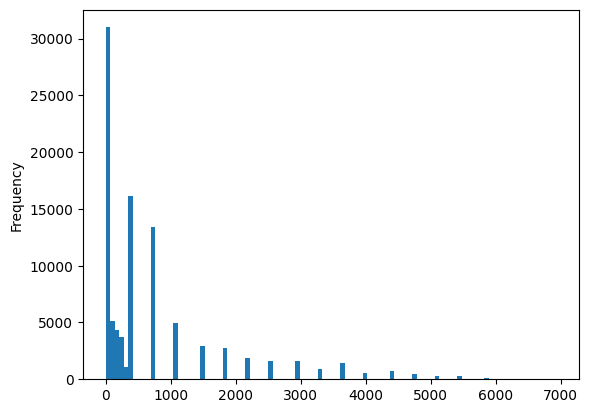

Age upon Outcome Days


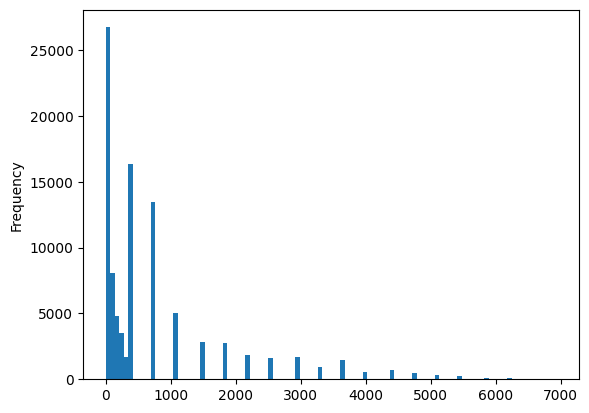

In [ ]:
for c in numerical_features_all:
    print(c)
    df[c].plot.hist(bins=100)
    plt.show()

4. **Scatter plots and Correlation**

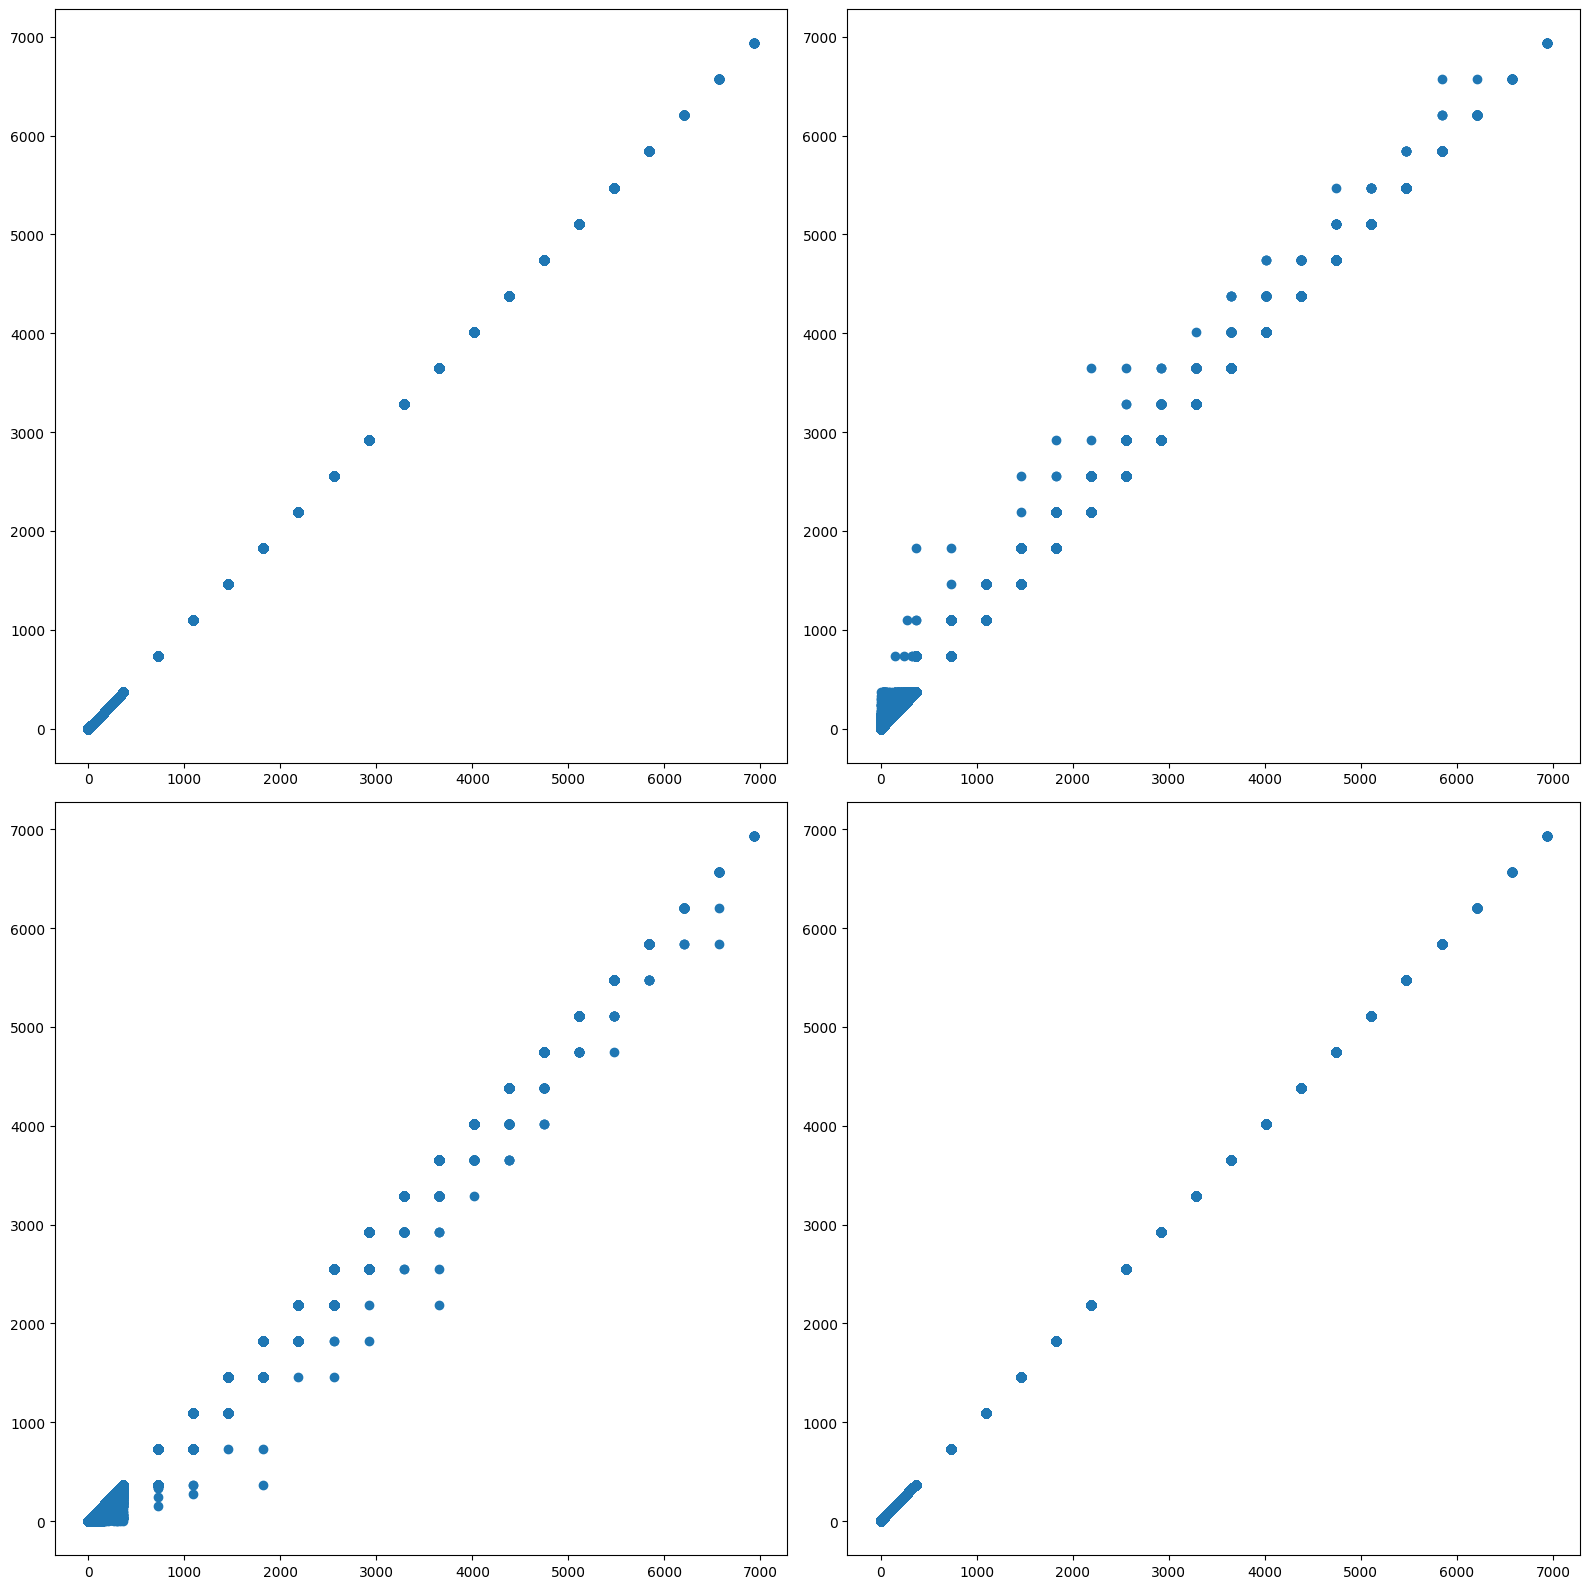

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(numerical_features_all), len(numerical_features_all), figsize=(16, 16), sharex=False, sharey=False)
for i in range(0,len(numerical_features_all)):
    for j in range(0,len(numerical_features_all)):
        axes[i,j].scatter(x = df[numerical_features_all[i]], y = df[numerical_features_all[j]])
fig.tight_layout()

SCATTERPLOT WITH IDENTIFICATION

target 0 or 1

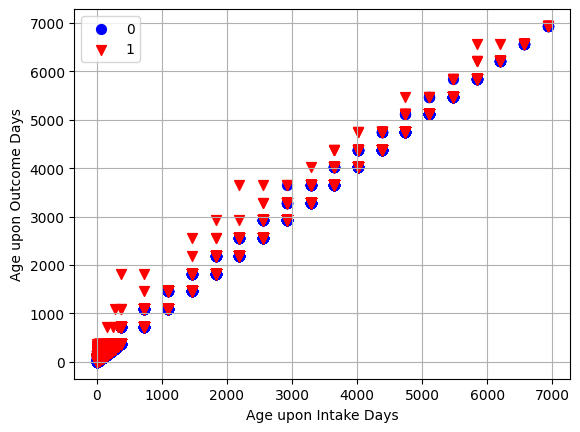

In [ ]:
import seaborn as sns

X1 = df[[numerical_features_all[0], numerical_features_all[1]]][df[model_target] == 0]
X2 = df[[numerical_features_all[0], numerical_features_all[1]]][df[model_target] == 1]

plt.scatter(X1.iloc[:,0],
            X1.iloc[:,1],
            s=50,
            c='blue',
            marker='o',
            label='0')

plt.scatter(X2.iloc[:,0],
            X2.iloc[:,1],
            s=50,
            c='red',
            marker='v',
            label='1')

plt.xlabel(numerical_features_all[0])
plt.ylabel(numerical_features_all[1])
plt.legend()
plt.grid()
plt.show()

CORRELATION MATRIX HEATMAT

In [ ]:
cols=[numerical_features_all[0], numerical_features_all[1]]
#print(df[cols].corr())
df[cols].corr().style.background_gradient(cmap='tab20c')

,Age upon Intake Days,Age upon Outcome Days
Age upon Intake Days,1.000000,0.998839
Age upon Outcome Days,0.998839,1.000000


FANCY EXAMPLE OF USING Seaborn

<Axes: >

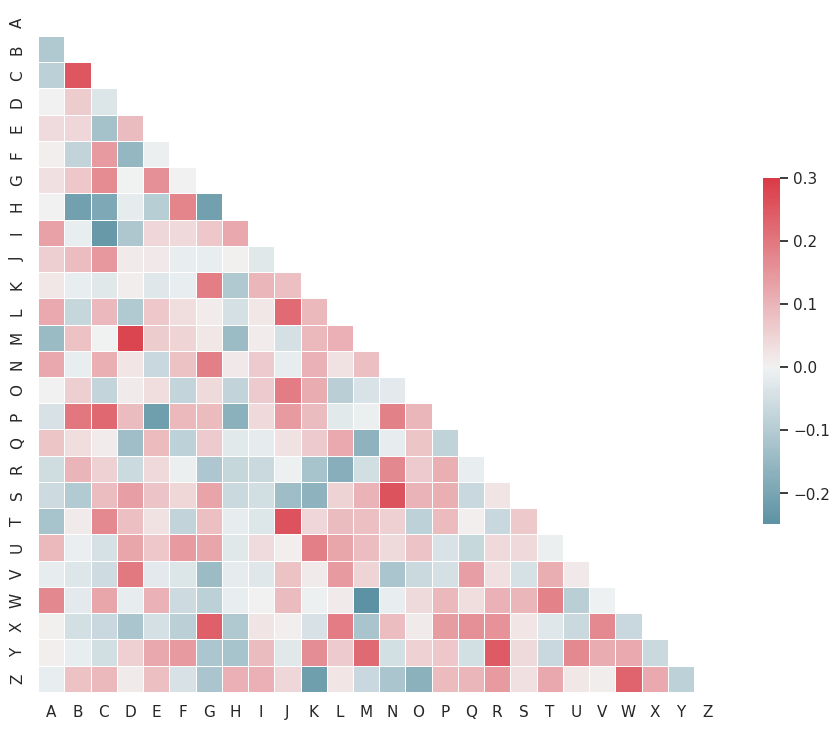

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

5. **Handling Missing Values**

Let's first check the number of missing (nan) values for each column.

In [ ]:
df.isna().sum()

,0
Pet ID,0
Outcome Type,0
Sex upon Outcome,1
Name,36343
Found Location,0
Intake Type,0
Intake Condition,0
Pet Type,0
Sex upon Intake,1
Breed,0


DROP COLUMNS WITH NaN

In [ ]:
threshold = 2/10
print((df.isna().sum()/len(df.index)))
columns_to_drop = df.loc[:,list(((df.isna().sum()/len(df.index))>=threshold))].columns
print(columns_to_drop)

df_columns_dropped = df.drop(columns_to_drop, axis = 1)
df_columns_dropped.head()

Pet ID                   0.000000
Outcome Type             0.000000
Sex upon Outcome         0.000010
Name                     0.380706
Found Location           0.000000
Intake Type              0.000000
Intake Condition         0.000000
Pet Type                 0.000000
Sex upon Intake          0.000010
Breed                    0.000000
Color                    0.000000
Age upon Intake Days     0.000000
Age upon Outcome Days    0.000000
dtype: float64
Index(['Name'], dtype='object')


,Pet ID,Outcome Type,Sex upon Outcome,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Age upon Outcome Days
0,A794011,1.0,Neutered Male,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,Domestic Shorthair Mix,Brown Tabby/White,730,730
1,A776359,1.0,Neutered Male,7201 Levander Loop in Austin (TX),Stray,Normal,Dog,Intact Male,Chihuahua Shorthair Mix,White/Brown,365,365
2,A674754,0.0,Intact Male,12034 Research in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,Orange Tabby,6,6
3,A689724,1.0,Neutered Male,2300 Waterway Bnd in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Black,60,60
4,A680969,1.0,Neutered Male,4701 Staggerbrush Rd in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,White/Orange Tabby,7,60


In [ ]:

df_columns_dropped.isna().sum()

,0
Pet ID,0
Outcome Type,0
Sex upon Outcome,1
Found Location,0
Intake Type,0
Intake Condition,0
Pet Type,0
Sex upon Intake,1
Breed,0
Color,0


In [ ]:
df_columns_dropped.shape

(95462, 12)

DROP ROWS WITH NaN

In [ ]:
df_missing_dropped = df.dropna()

In [ ]:
df_missing_dropped.isna().sum()

,0
Pet ID,0
Outcome Type,0
Sex upon Outcome,0
Name,0
Found Location,0
Intake Type,0
Intake Condition,0
Pet Type,0
Sex upon Intake,0
Breed,0


In [ ]:
df_missing_dropped.shape

(59118, 13)

Impute (fill-in) missing values with .fillna()

**Imputing Numerical Values**: The easiest way to impute numerical values is to get the **average (mean) value** for the corresponding column and use that as the new value for each missing record in that column.

In [ ]:
# Impute numerical features by using the mean per feature to replace the nans

# Assign our df to a new df
df_imputed = df.copy()
print(df_imputed[numerical_features_all].isna().sum())

# Impute our two numerical features with the means.
df_imputed[numerical_features_all] = df_imputed[numerical_features_all].fillna(df_imputed[numerical_features_all].mean())

print(df_imputed[numerical_features_all].isna().sum())

Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64
Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64


**Imputing Categorical Values**: We can impute categorical values by getting the most common (mode) value for the corresponding column and use that as the new value for each missing record in that column.

In [ ]:
# Impute categorical features by using the mode per feature to replace the nans

# Assign our df to a new df
df_imputed_c = df.copy()
print(df_imputed_c[categorical_features_all].isna().sum())

for c in categorical_features_all:
    # Find the mode per each feature
    mode_impute = df_imputed_c[c].mode()
    print(c, mode_impute)

    # Impute our categorical features with the mode
    # "inplace=True" parameter replaces missing values in place (no need for left handside assignment)
    df_imputed_c[c].fillna(False, inplace=True)

print(df_imputed_c[categorical_features_all].isna().sum())

Pet ID                  0
Sex upon Outcome        1
Name                36343
Found Location          0
Intake Type             0
Intake Condition        0
Pet Type                0
Sex upon Intake         1
Breed                   0
Color                   0
dtype: int64
Pet ID 0        A047759
1        A134067
2        A141142
3        A163459
4        A165752
          ...   
95457    A819862
95458    A819864
95459    A819865
95460    A819895
95461    A819908
Name: Pet ID, Length: 95462, dtype: object
Sex upon Outcome 0    Neutered Male
Name: Sex upon Outcome, dtype: object
Name 0    Bella
Name: Name, dtype: object
Found Location 0    Austin (TX)
Name: Found Location, dtype: object
Intake Type 0    Stray
Name: Intake Type, dtype: object
Intake Condition 0    Normal
Name: Intake Condition, dtype: object
Pet Type 0    Dog
Name: Pet Type, dtype: object
Sex upon Intake 0    Intact Male
Name: Sex upon Intake, dtype: object
Breed 0    Domestic Shorthair Mix
Name: Breed, dtype: object
Colo

Impute (fill-in) missing values with sklearn's SimpleImputer

A more elegant way to implement imputation is using sklearn's **SimpleImputer**, a class implementing .fit() and .transform() methods.

In [ ]:
# Impute numerical columns by using the mean per column to replace the nans

from sklearn.impute import SimpleImputer

# Assign our df to a new df
df_sklearn_imputed = df.copy()
print(df_sklearn_imputed[numerical_features_all].isna().sum())

imputer = SimpleImputer(strategy='mean')
df_sklearn_imputed[numerical_features_all] = imputer.fit_transform(df_sklearn_imputed[numerical_features_all])

print(df_sklearn_imputed[numerical_features_all].isna().sum())

Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64
Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64


In [ ]:
# Impute categorical columns by using the mode per column to replace the nans

# Pick some categorical features you desire to impute with this approach
categoricals_missing_values = df[categorical_features_all].loc[:,list(((df[categorical_features_all].isna().sum()/len(df.index)) > 0.0))].columns
columns_to_impute = categoricals_missing_values[1:3]
print(columns_to_impute)

from sklearn.impute import SimpleImputer

# Assign our df to a new df
df_sklearn_imputer = df.copy()
print(df_sklearn_imputer[columns_to_impute].isna().sum())

imputer = SimpleImputer(strategy='most_frequent')
df_sklearn_imputer[columns_to_impute] = imputer.fit_transform(df_sklearn_imputer[columns_to_impute])

print(df_sklearn_imputer[columns_to_impute].isna().sum())

Index(['Name', 'Sex upon Intake'], dtype='object')
Name               36343
Sex upon Intake        1
dtype: int64
Name               0
Sex upon Intake    0
dtype: int64


In [ ]:
# Impute categorical columns by using a placeholder "Missing"

# Pick some categorical features you desire to impute with this approach
categoricals_missing_values = df[categorical_features_all].loc[:,list(((df[categorical_features_all].isna().sum()/len(df.index)) > 0.0))].columns
columns_to_impute = categoricals_missing_values[1:3]
print(columns_to_impute)

from sklearn.impute import SimpleImputer

# Assign our df to a new df
df_sklearn_imputer = df.copy()
print(df_sklearn_imputer[columns_to_impute].isna().sum())

imputer = SimpleImputer(strategy='constant', fill_value = "Missing")
df_sklearn_imputer[columns_to_impute] = imputer.fit_transform(df_sklearn_imputer[columns_to_impute])

print(df_sklearn_imputer[columns_to_impute].isna().sum())

Index(['Name', 'Sex upon Intake'], dtype='object')
Name               36343
Sex upon Intake        1
dtype: int64
Name               0
Sex upon Intake    0
dtype: int64
